**Principal Component Analysis**, also known as the **Karhunen-Loeve Transform**, is a
technique used to search for patterns in high-dimensional data. PCA is commonly
used to explore and visualize high-dimensional data sets. It can also be used to
compress data, and process data before it is used by another estimator. PCA reduces
a set of possibly-correlated, high-dimensional variables to a lower-dimensional
set of linearly uncorrelated synthetic variables called principal components. The
lower-dimensional data will preserve as much of the variance of the original data
as possible.  

In general, an n-dimensional dataset can be reduced by projecting the dataset onto a
k-dimensional subspace, where k is less than n. More formally, PCA can be used to
find a set of vectors that span a subspace, which minimizes the sum of the squared
errors of the projected data. This projection will retain the greatest proportion of the
original data set's variance.  

PCA rotates the data set to align with its principal components to maximize the variance
contained within the first several principal components.  

PCA is most useful when the variance in a data set is distributed unevenly across the
dimensions. Consider a three-dimensional data set with a spherical convex hull. PCA
cannot be used effectively with this data set because there is equal variance in each
dimension; none of the dimensions can be discarded without losing a significant
amount of information.
It is easy to visually identify the principal components of data sets with only two or
three dimensions.

### Performing Principal Component Analysis   

#### Variance, Covariance, and Covariance Matrices  

variance is a measure of how a set of values are spread out. Variance is
calculated as the average of the squared differences of the values and mean of the
values -
$$ var(s^2) = \frac{\sum_{i=1}^{n}(x_i - \bar x)^2}{n-1} $$ 


Covariance is a measure of how much two variables change together; it is a measure
of the strength of the correlation between two sets of variables. If the covariance of two
variables is zero, the variables are uncorrelated.  
....................Note that uncorrelated variables are
not necessarily independent, as correlation is only a measure of linear dependence. The
covariance of two variables is calculated using the following equation:
$$ coVar(X,y) = \frac{\sum_{i=1}^{n}(x_i - \bar x)(y_i - \bar y)}{n-1} $$ 

A covariance
matrix describes the covariance values between each pair of dimensions in a data
set. The element (i, j) indicates the covariance of the ith and jth dimensions of the
data.

In [34]:
# import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

%matplotlib inline

In [8]:
X = [[2, 0, -1.4],
	 [2.2, 0.2, -1.5],
	 [2.4, 0.1, -1],
	 [1.9, 0, -1.2]]

print(np.array(X))
print(np.array(X).T)


print(np.cov(np.array(X).T))
print(np.cov(np.array(X)))

[[ 2.   0.  -1.4]
 [ 2.2  0.2 -1.5]
 [ 2.4  0.1 -1. ]
 [ 1.9  0.  -1.2]]
[[ 2.   2.2  2.4  1.9]
 [ 0.   0.2  0.1  0. ]
 [-1.4 -1.5 -1.  -1.2]]
[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]
[[ 2.92        3.16        2.95        2.67      ]
 [ 3.16        3.43        3.175       2.885     ]
 [ 2.95        3.175       3.01        2.705     ]
 [ 2.67        2.885       2.705       2.44333333]]


#### Eigenvectors and eigenvalues  

An eigenvector of a matrix is a non-zero vector that satisfies the following equation:  

$$ A \overrightarrow{v} = \lambda\overrightarrow{v} $$

In [11]:
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print("eigen vector : ", w)
print("eigen values : ",v)

eigen vector :  [-0.99999998 -1.00000002]
eigen values :  [[ 0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


#### Dimensionality reduction with Principal Component Analysis

In [12]:
x1 = [ 0.9, 2.4, 1.2, 0.5, 0.3, 1.8, 0.5, 0.3, 2.5, 1.3 ]
x2 = [ 1, 2.6, 1.7, 0.7, 0.7, 1.4, 0.6, 0.6, 2.6, 1.1 ]

In [13]:
# deducting mean

x11 = x1 - np.mean(x1)
x21 = x2 - np.mean(x2)

principal components are the eigenvectors of the data's covariance matrix ordered
by their eigenvalues.  

**Way1:** The first technique requires calculating the covariance matrix of the
data. Since the covariance matrix will be square, we can calculate the eigenvectors
and eigenvalues

**Way2:** The
second technique uses singular value decomposition of the data matrix to find the
eigenvectors and square roots of the eigenvalues of the covariance matrix.

In [15]:
cov = np.cov(x11, x21)
print(cov)

[[ 0.68677778  0.60666667]
 [ 0.60666667  0.59777778]]


In [16]:
w, v = np.linalg.eig(cov)

print("eigen vector : ", w)
print("eigen values : ",v)

eigen vector :  [ 1.25057433  0.03398123]
eigen values :  [[ 0.73251454 -0.68075138]
 [ 0.68075138  0.73251454]]


The first eigenvector
has the greatest eigenvalue and is the first principal component. We will build a
transformation matrix in which each column of the matrix is the eigenvector for
a principal component. If we were reducing a five-dimensional data set to three
dimensions, we would build a matrix with three columns

In [27]:
A = np.array([x11, x21]).T
l = np.array([[0.73251454], 
             [0.68075138]])

np.dot(A, l)

array([[-0.40200434],
       [ 1.78596968],
       [ 0.29427599],
       [-0.89923557],
       [-1.04573848],
       [ 0.5295593 ],
       [-0.96731071],
       [-1.11381362],
       [ 1.85922113],
       [-0.04092339]])

Many implementations of PCA, including the one of scikit-learn, use singular value
decomposition to calculate the eigenvectors and eigenvalues. SVD is given by the
following equation:  
    
$$ X = U \sum V^T $$  

The columns of U are called left singular vectors of the data matrix, the columns of
V are its right singular vectors, and the diagonal entries of are its singular values.

####  Using PCA to visualize high-dimensional data

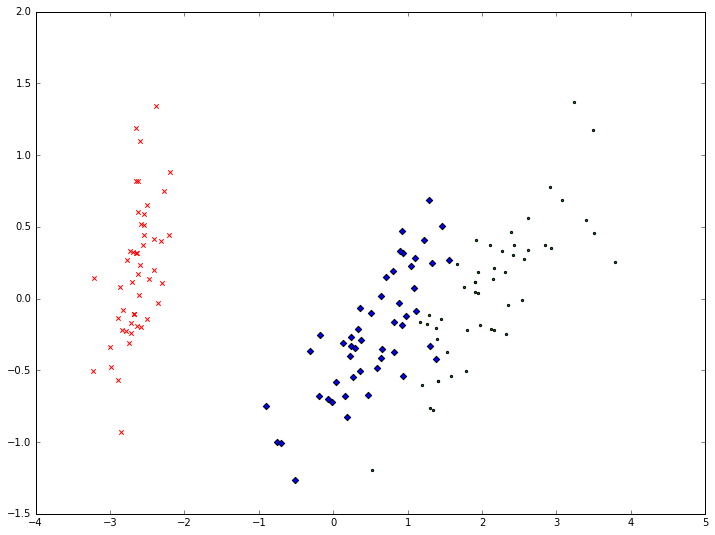

In [36]:
data = load_iris()
y = data.target
X = data.data

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
	if y[i] == 0:
		red_x.append(reduced_X[i][0])
		red_y.append(reduced_X[i][1])
	elif y[i] == 1:
		blue_x.append(reduced_X[i][0])
		blue_y.append(reduced_X[i][1])
	else:
		green_x.append(reduced_X[i][0])
		green_y.append(reduced_X[i][1])

plt.figure(figsize=(12,9))        
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()